In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist = fetch_openml('mnist_784')

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
data, target = mnist.data, mnist.target
data.shape

(70000, 784)

In [4]:
norm = MinMaxScaler()
data_norm = norm.fit_transform(data)
x_train,x_test,y_train,y_test = train_test_split(data_norm,target,test_size=0.1)

<h1> PCA </h1>

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 300)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [6]:
x_train_pca.shape

(63000, 300)

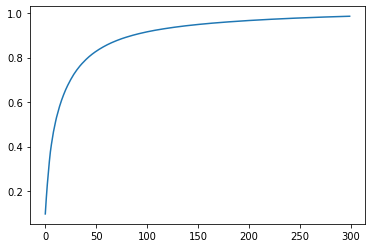

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))

<h1> LDA</h1>

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
x_train_lda = lda.fit_transform(x_train,y_train)
x_test_lda = lda.transform(x_test)
x_train_lda.shape

(63000, 9)

<h1>KPCA</h1>

In [9]:
#from sklearn.decomposition import KernelPCA
#kpca= KernelPCA()
#x_train_kpca = kpca.fit_transform(x_train)
#x_test_kpca = kpca.transform(x_test)
#x_train_kpca.shape

<h1>Agglomerative Clustering</h1>

In [10]:
from sklearn.cluster import AgglomerativeClustering
ag1 = AgglomerativeClustering(linkage='single')
y_ag1 = ag1.fit_predict(x_test)
y_ag1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
import numpy as np
np.unique(y_ag1)

from sklearn.cluster import DBSCAN
db = DBSCAN()
y_db = db.fit_predict(data)
np.unique(y_db)
